# 01_Data_Visualization_XYZ(Quadril x Joelho)

## TL;DR
Fazer uma descrição de 3 linhas do objetivo do notebook e conclusões presentes na análise.

## Objetivo

Descrever com clareza qual o objetivo desse notebook.

## Dados

Descrever a base de dados utilizada.

## Modelos (opcional)

Em caso de treinamento ou comparação de modelos, descrever os modelos considerados

## Conclusões
Listar **todas** as conclusões obtidas no notebook:
1. conclusão 1
2. conclusão 2
3. etc.


## Observações importantes:
1. Sempre organize o conteúdo utilizando células markdown e seções. Também utilize células de texto para escrever sua análise das figuras que forem geradas.
2. Lembre-se que essa primeira célula deve ter informação suficiente para entender o que foi feito e quais conclusões você chegou, sem ter que ler o notebook inteiro. Isso agiliza muito a busca por informações ao longo do projeto. Além disso, seu eu do futuro (ou novas pessoas que entrem no projeto) vai agradecer se o seu notebook estiver bem escrito e completo.

# Importando as Bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Importando Dataset

In [3]:
# Pegando apenas a 23 coluna para fazer o data frame 
# cminho até o arquivo data\gabriele_data_set\MS_Gabriele_STS\MS_Gabriele_STS\voluntario1\005.csv
# Adicionando um Header para a coluna  
df = pd.read_csv("../../data/gabriele_data_set/MS_Gabriele_STS/MS_Gabriele_STS/voluntario1/003.csv",skiprows=1,header=None) 
print(df.head())

         0         1         2         3        4         5        6   \
0  626.6403 -0.078125  1.129883  0.132812  3.71875  -9.46875 -1.34375   
1  626.6739 -0.078125  1.129883  0.132812  3.71875  -9.46875 -1.34375   
2  626.7075 -0.061523  1.046875 -0.089844 -1.25000 -13.03125 -6.37500   
3  626.7408 -0.061523  1.046875 -0.089844 -1.25000 -13.03125 -6.37500   
4  626.7742 -0.061523  1.046875 -0.089844 -1.25000 -13.03125 -6.37500   

         7         8         9   ...        15      16      17       18  \
0 -0.208008 -0.011719  0.803711  ... -0.323242 -2.8125 -1.0625  5.59375   
1 -0.208008 -0.011719  0.803711  ... -0.323242 -2.8125 -1.0625  5.59375   
2 -0.208008 -0.011719  0.803711  ... -0.323242 -2.8125 -1.0625  5.59375   
3 -0.208008 -0.011719  0.803711  ... -0.323242 -2.8125 -1.0625  5.59375   
4 -0.208008 -0.011719  0.803711  ... -0.323242 -2.8125 -1.0625  5.59375   

         19        20        21       22        23        24  
0  94.80544  218.8205  153.2465  77.6674  258.2

In [4]:
df.info()
print(df.isnull().sum())  # Quantidade de valores nulos
df.describe()
# Descrição estatistica da coluna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       424 non-null    float64
 1   1       424 non-null    float64
 2   2       424 non-null    float64
 3   3       424 non-null    float64
 4   4       424 non-null    float64
 5   5       424 non-null    float64
 6   6       424 non-null    float64
 7   7       424 non-null    float64
 8   8       424 non-null    float64
 9   9       424 non-null    float64
 10  10      424 non-null    float64
 11  11      424 non-null    float64
 12  12      424 non-null    float64
 13  13      424 non-null    float64
 14  14      424 non-null    float64
 15  15      424 non-null    float64
 16  16      424 non-null    float64
 17  17      424 non-null    float64
 18  18      424 non-null    float64
 19  19      424 non-null    float64
 20  20      424 non-null    float64
 21  21      424 non-null    float64
 22  22

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
count,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,...,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000
mean,633.692137,-0.063997,0.932573,0.050738,8.551518,-1.017468,-1.485259,-0.105766,0.554314,0.345705,...,-0.254906,-4.186542,-0.716170,-1.046212,149.804252,252.246922,161.463789,115.951765,306.480785,202.108131
std,4.086024,0.109486,0.170960,0.307360,37.767312,10.898729,8.072375,0.222180,0.458149,0.432274,...,0.105493,13.540024,8.427403,6.896710,44.256033,31.576814,12.202738,35.108958,44.566920,29.454405
min,626.640300,-0.428711,0.234375,-1.215820,-79.781250,-27.531250,-31.250000,-0.483398,-0.084961,-0.108398,...,-0.932617,-86.437500,-37.906250,-31.218750,94.750150,209.582700,142.295300,62.235240,245.150100,173.064400
25%,630.162700,-0.106445,0.900391,0.002930,-7.656250,-5.625000,-3.312500,-0.331299,0.015625,-0.064453,...,-0.300781,-3.437500,-2.421875,-1.187500,97.151040,213.612900,147.328650,80.423280,261.189925,174.766900
50%,633.683200,-0.054688,0.955078,0.099609,1.500000,0.593750,-0.562500,-0.034180,0.898438,0.110352,...,-0.252930,-0.687500,-0.312500,-0.500000,185.183400,277.357700,170.949100,136.165000,343.494100,180.676800
75%,637.205300,-0.010498,1.003907,0.197266,8.726562,2.718750,2.250000,0.091797,0.956055,0.867188,...,-0.194580,0.656250,2.343750,1.750000,189.812100,278.350600,172.249900,150.392400,348.462900,236.528700
max,640.759000,0.205078,1.225586,0.394531,171.625000,34.906250,24.812500,0.261719,1.125000,0.948242,...,-0.054688,27.156250,46.812500,22.312500,192.299700,282.175300,173.950200,152.696100,353.609000,242.124800


In [5]:
# Contar valores ausentes
print("Valores nulos:", df.isnull().sum())

# Contar valores duplicados
print("Valores duplicados:", df.duplicated().sum())


Valores nulos: 0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
dtype: int64
Valores duplicados: 0


# Criação de Index temporal

In [6]:
# Criando uma coluna de tempo (considerando que a 1ª linha é o tempo 0s)]

# Definindo essa coluna como o índice do DataFrame

df["Tempo (s)"] = np.arange(len(df)) / 30

df.set_index("Tempo (s)", inplace=True)

# Visualizando os dados após a conversão
print(df.head())

#Usando isso podemos ver que o exercicio vai ter no Total de .... 
print(df.tail())


                 0         1         2         3        4         5        6   \
Tempo (s)                                                                       
0.000000   626.6403 -0.078125  1.129883  0.132812  3.71875  -9.46875 -1.34375   
0.033333   626.6739 -0.078125  1.129883  0.132812  3.71875  -9.46875 -1.34375   
0.066667   626.7075 -0.061523  1.046875 -0.089844 -1.25000 -13.03125 -6.37500   
0.100000   626.7408 -0.061523  1.046875 -0.089844 -1.25000 -13.03125 -6.37500   
0.133333   626.7742 -0.061523  1.046875 -0.089844 -1.25000 -13.03125 -6.37500   

                 7         8         9   ...        15      16      17  \
Tempo (s)                                ...                             
0.000000  -0.208008 -0.011719  0.803711  ... -0.323242 -2.8125 -1.0625   
0.033333  -0.208008 -0.011719  0.803711  ... -0.323242 -2.8125 -1.0625   
0.066667  -0.208008 -0.011719  0.803711  ... -0.323242 -2.8125 -1.0625   
0.100000  -0.208008 -0.011719  0.803711  ... -0.323242 -2.8125

# Separação de Quadril e Joelho 

### Seleção das colunas que contém os ângulos Quadril e Joelho (XYZ)

In [7]:

# Selecionar colunas de interesse
quadril_x = df.iloc[:, 19]
quadril_y = df.iloc[:, 20]
quadril_z = df.iloc[:, 21]
joelho_x = df.iloc[:, 22]
joelho_y = df.iloc[:, 23]
joelho_z = df.iloc[:, 24]

# Renomear colunas para facilitar análise
quadril_x.name = "Quadril X"
quadril_y.name = "Quadril Y"
quadril_z.name = "Quadril Z"
joelho_x.name = "Joelho X"
joelho_y.name = "Joelho Y"
joelho_z.name = "Joelho Z"

# Análise estatística individual
print("\nAnálise do Quadril:")
print(pd.DataFrame({quadril_x.name: quadril_x.describe(),
                    quadril_y.name: quadril_y.describe(),
                    quadril_z.name: quadril_z.describe()}))

print("\nAnálise do Joelho:")
print(pd.DataFrame({joelho_x.name: joelho_x.describe(),
                    joelho_y.name: joelho_y.describe(),
                    joelho_z.name: joelho_z.describe()}))




Análise do Quadril:
        Quadril X   Quadril Y   Quadril Z
count  424.000000  424.000000  424.000000
mean   149.804252  252.246922  161.463789
std     44.256033   31.576814   12.202738
min     94.750150  209.582700  142.295300
25%     97.151040  213.612900  147.328650
50%    185.183400  277.357700  170.949100
75%    189.812100  278.350600  172.249900
max    192.299700  282.175300  173.950200

Análise do Joelho:
         Joelho X    Joelho Y    Joelho Z
count  424.000000  424.000000  424.000000
mean   115.951765  306.480785  202.108131
std     35.108958   44.566920   29.454405
min     62.235240  245.150100  173.064400
25%     80.423280  261.189925  174.766900
50%    136.165000  343.494100  180.676800
75%    150.392400  348.462900  236.528700
max    152.696100  353.609000  242.124800


# Fazendo a Visualização de Dados

## Graficos dos Eixos X, Y e Z do Quadril e Joelho

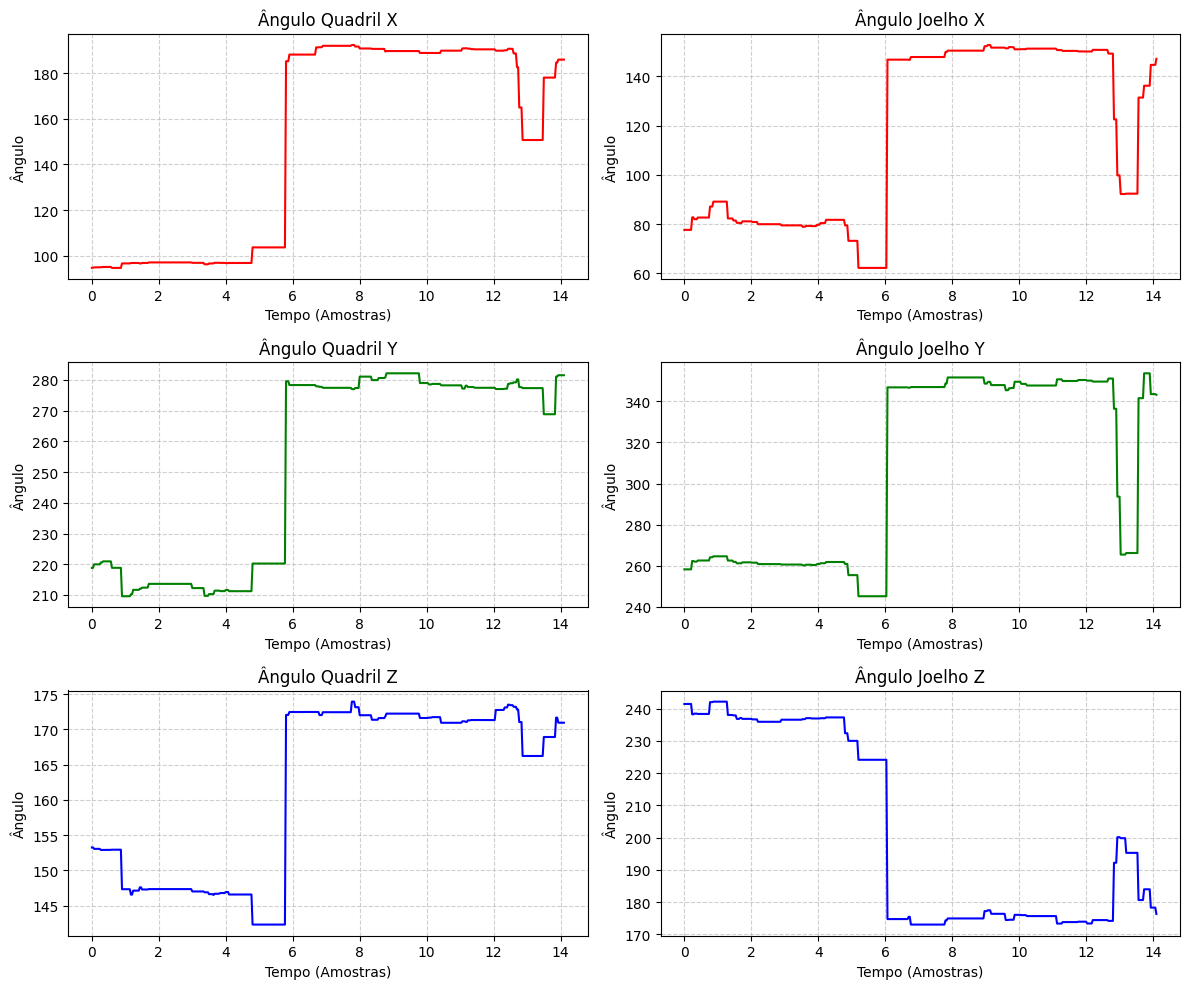

In [8]:
import matplotlib.pyplot as plt

# Criar subplots 3x2 (3 linhas, 2 colunas)
fig, axes = plt.subplots(3, 2, figsize=(12, 10))

# Lista de títulos e dados
titulos = [
    "Ângulo Quadril X", "Ângulo Joelho X",
    "Ângulo Quadril Y", "Ângulo Joelho Y",
    "Ângulo Quadril Z", "Ângulo Joelho Z"
]
cores = ["red", "red", "green", "green", "blue", "blue"]
dados = [quadril_x, joelho_x, quadril_y, joelho_y, quadril_z, joelho_z]

# Loop para configurar os plots
for i, ax in enumerate(axes.flat):
    ax.plot(dados[i], color=cores[i])
    ax.set_title(titulos[i], fontsize=12)  # Tamanho do título
    ax.set_ylabel("Ângulo", fontsize=10)  # Rótulo do eixo Y
    ax.set_xlabel("Tempo (Amostras)", fontsize=10)  # Exibir sempre o eixo X
    ax.grid(True, linestyle="--", alpha=0.6)  # Adiciona grade pontilhada

# Melhor organização do layout
plt.tight_layout()
plt.show()



É possível observar que os eixos X em ambos os gráficos apresentam grande oscilação, tornando sua utilização para a análise de compensação de movimento mais desafiadora.

## Graficos dos Eixos X, Y e Z do Quadril com o index temporal

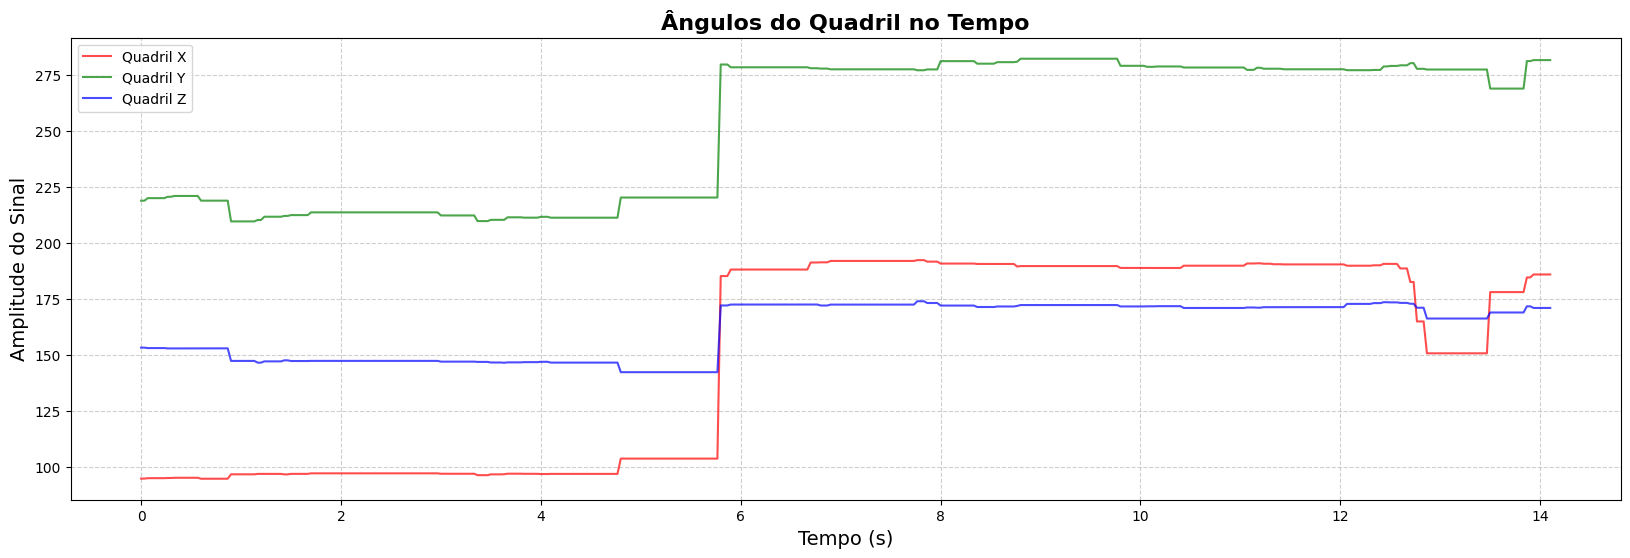

In [9]:


# Criar figura
plt.figure(figsize=(20, 6))

# Plotar os ângulos do quadril nos eixos X, Y e Z
plt.plot(df.index, quadril_x, color='red', alpha=0.7, linestyle="-", label="Quadril X")
plt.plot(df.index, quadril_y, color='green', alpha=0.7, linestyle="-", label="Quadril Y")
plt.plot(df.index, quadril_z, color='blue', alpha=0.7, linestyle="-", label="Quadril Z")

# Configurações do gráfico
plt.title("Ângulos do Quadril no Tempo", fontsize=16, fontweight="bold")
plt.xlabel("Tempo (s)", fontsize=14)
plt.ylabel("Amplitude do Sinal", fontsize=14)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

# Exibir gráfico
plt.show()


## Graficos dos Eixos X, Y e Z do Joelho com o index temporal

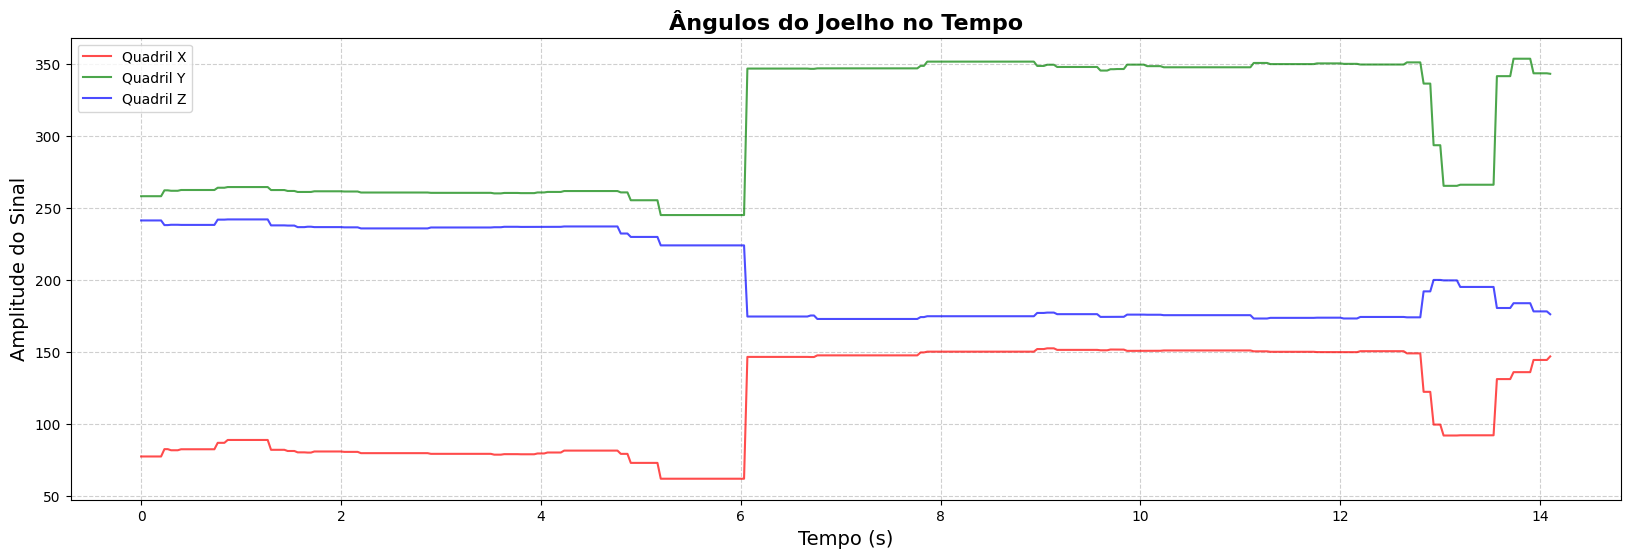

In [10]:


# Criar figura
plt.figure(figsize=(20, 6))

# Plotar os ângulos do quadril nos eixos X, Y e Z
plt.plot(df.index, joelho_x, color='red', alpha=0.7, linestyle="-", label="Quadril X")
plt.plot(df.index, joelho_y, color='green', alpha=0.7, linestyle="-", label="Quadril Y")
plt.plot(df.index, joelho_z, color='blue', alpha=0.7, linestyle="-", label="Quadril Z")

# Configurações do gráfico
plt.title("Ângulos do Joelho no Tempo", fontsize=16, fontweight="bold")
plt.xlabel("Tempo (s)", fontsize=14)
plt.ylabel("Amplitude do Sinal", fontsize=14)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

# Exibir gráfico
plt.show()


## Grafico do Quadril e Joelho junto 

<Figure size 640x480 with 0 Axes>

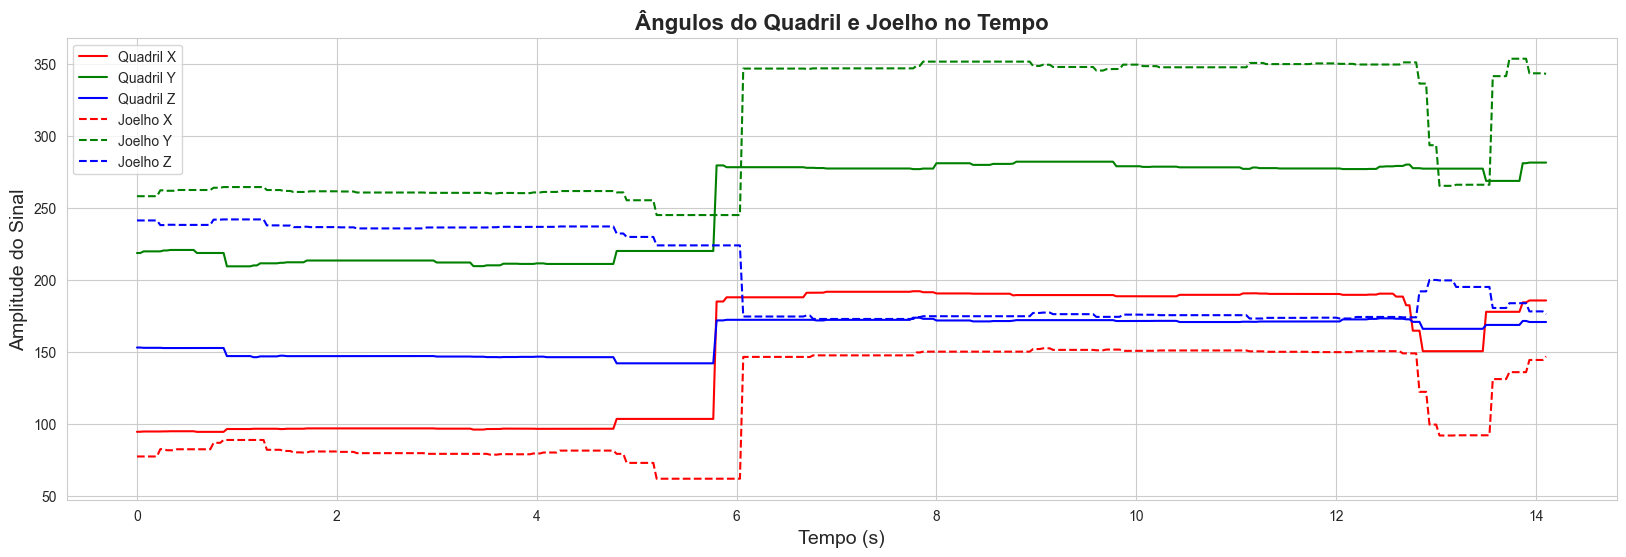

In [11]:

plt.clf()
sns.set_style("whitegrid")

# Criar figura
plt.figure(figsize=(20, 6))

# Plotar os ângulos do quadril nos eixos X, Y e Z
sns.lineplot(x=df.index, y=quadril_x, color='red', label="Quadril X")
sns.lineplot(x=df.index, y=quadril_y, color='green', label="Quadril Y")
sns.lineplot(x=df.index, y=quadril_z, color='blue', label="Quadril Z")

# Plotar os ângulos do joelho nos eixos X, Y e Z
sns.lineplot(x=df.index, y=joelho_x, color='red', linestyle="--", label="Joelho X")
sns.lineplot(x=df.index, y=joelho_y, color='green', linestyle="--", label="Joelho Y")
sns.lineplot(x=df.index, y=joelho_z, color='blue', linestyle="--", label="Joelho Z")

# Configurações do gráfico
plt.title("Ângulos do Quadril e Joelho no Tempo", fontsize=16, fontweight="bold")
plt.xlabel("Tempo (s)", fontsize=14)
plt.ylabel("Amplitude do Sinal", fontsize=14)
plt.legend()
plt.show()

Identificação de que o joelho se movimenta primeiro que o quadril

## Manipulação do tempo para melhor visualização dos gráficos

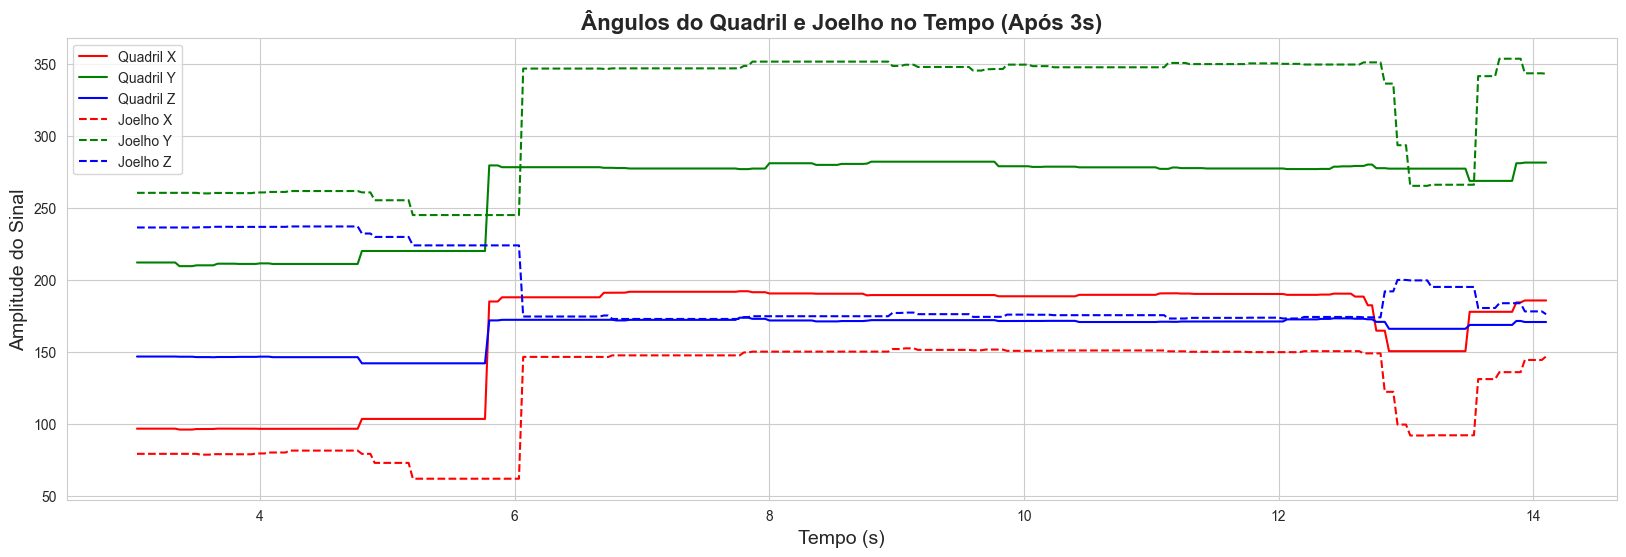

In [12]:


# Filtrar os dados para remover os primeiros 3 segundos
df_filtrado = df.loc[df.index > 3].copy() 

# Estilo do Seaborn para um visual mais profissional
sns.set_style("whitegrid")

# Criar figura
plt.figure(figsize=(20, 6))

# Plotar os ângulos do quadril nos eixos X, Y e Z
sns.lineplot(x=df_filtrado.index, y=df_filtrado.iloc[:, 19], color='red', label="Quadril X")  # Coluna 19ª
sns.lineplot(x=df_filtrado.index, y=df_filtrado.iloc[:, 20], color='green', label="Quadril Y")  # Coluna 20ª
sns.lineplot(x=df_filtrado.index, y=df_filtrado.iloc[:, 21], color='blue', label="Quadril Z")  # Coluna 21ª

# Plotar os ângulos do joelho nos eixos X, Y e Z
sns.lineplot(x=df_filtrado.index, y=df_filtrado.iloc[:, 22], color='red', linestyle="--", label="Joelho X")  # Coluna 22ª
sns.lineplot(x=df_filtrado.index, y=df_filtrado.iloc[:, 23], color='green', linestyle="--", label="Joelho Y")  # Coluna 23ª
sns.lineplot(x=df_filtrado.index, y=df_filtrado.iloc[:, 24], color='blue', linestyle="--", label="Joelho Z")  # Coluna 24ª

# Configurações do gráfico
plt.title("Ângulos do Quadril e Joelho no Tempo (Após 3s)", fontsize=16, fontweight="bold")
plt.xlabel("Tempo (s)", fontsize=14)
plt.ylabel("Amplitude do Sinal", fontsize=14)
plt.legend()
plt.show()


# Conclusões

Ao longo deste teste, foi possível realizar uma análise detalhada dos ângulos do joelho e do quadril, tanto de forma individual quanto sincronizada. A separação clara dos eixos X, Y e Z permitiu uma avaliação mais precisa do comportamento de cada articulação ao longo do tempo. Além disso, identificou-se que os eixos X apresentaram maior oscilação, dificultando sua utilização na análise de compensação de movimento, enquanto os eixos Y e Z se mostraram mais estáveis e úteis para identificar variações. Dessa forma, a abordagem utilizada possibilitou uma melhor compreensão dos padrões de movimento e abre caminho para futuras investigações e aprimoramentos na análise biomecânica.
Pode copiar todo o conteúdo dessa seção lá na parte de conclusões do cabeçalho.